In [1]:
import pandas as pd
import pyarrow.parquet as pp
from frust.utils.analytics import summarize_ts_vibrations
import frust.vis as vis
vis.darkmode = True

In [2]:
schema = pp.read_schema("output_files/07_ts1_UMA_2.parquet")
L = schema.names
L

['custom_name',
 'ligand_name',
 'rpos',
 'constraint_atoms',
 'cid',
 'smiles',
 'atoms',
 'coords_embedded',
 'energy_uff',
 'xtb-gfnff-opt-electronic_energy',
 'xtb-gfnff-opt-normal_termination',
 'xtb-gfnff-opt-opt_coords',
 'xtb-gfn-opt-electronic_energy',
 'xtb-gfn-opt-normal_termination',
 'xtb-gfn-opt-opt_coords',
 'orca-ExtOpt-OptTS-electronic_energy',
 'orca-ExtOpt-OptTS-gibbs_energy',
 'orca-ExtOpt-OptTS-normal_termination',
 'orca-ExtOpt-OptTS-opt_coords',
 'orca-ExtOpt-OptTS-vibs']

In [3]:
L.remove("orca-ExtOpt-OptTS-vibs")

In [4]:
df_ts1 = pd.read_parquet("output_files/07_ts1_UMA_2.parquet")

df_ts1_1methyl =  df_ts1[df_ts1["ligand_name"] == "1-methylpyrrole"].dropna(subset=["orca-ExtOpt-OptTS-vibs"]).sort_values(by=["orca-ExtOpt-OptTS-normal_termination"])

In [11]:
vis.plot_mols(df_ts1.head(2), coord_indices=slice(-2, None))

Found 2 coordinate columns: ['xtb-gfn-opt-opt_coords', 'orca-ExtOpt-OptTS-opt_coords']
Processing 2 rows
Generated 4 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
vis.plot_row(df_ts1, 3)

Found 4 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'xtb-gfn-opt-opt_coords', 'orca-ExtOpt-OptTS-opt_coords']
Processing 1 rows
Generated 4 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
# orca-ExtOpt-NumFreq-vibs
# orca-ExtOpt-OptTS-opt_coords

In [8]:
# vis.plot_vibs(df, row_index=22, custom_coords_col_name="orca-ExtOpt-OptTS-opt_coords")
vis.plot_vibs(df_ts1, row_index=15, amplitude=0.5, transparent=True)

Normal mode 0 with frequency -1124.49 cm^-1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
df_mols = pd.read_parquet("output_files/08_UMA_mols.parquet")

In [10]:
vis.plot_lig(df_mols, ["dimer"])

Found 3 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'orca-ExtOpt-Opt-opt_coords']
Processing 1 rows
Generated 3 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
conversion_factor = 627.509474

d_gibbs = -1330.48658125 * conversion_factor
d_elec = -1331.160533733 * conversion_factor
HH_gibbs = -1.16222975 * conversion_factor

l_gibbs = -249.37977605 * conversion_factor
ts1_methyl_gibbs = -914.58750419 * conversion_factor
int1_gibbs = -665.23267599 * conversion_factor
int2_gibbs = -913.436269 * conversion_factor

HBpin_lig_gibbs = -659.91338555 * conversion_factor
HBpin_gibbs = -411.69083309 * conversion_factor

In [12]:
dG_ts1 = (2*(ts1_methyl_gibbs - l_gibbs) - d_gibbs) / 2
dG_ts1

22.315796256472822

In [13]:
dG_int1 = (2 * int1_gibbs - d_gibbs) / 2
dG_int1

6.660784025560133

In [14]:
dG_int2 = (2 * (int2_gibbs - l_gibbs + HH_gibbs) - d_gibbs) / 2
dG_int2

15.416605693928432

In [15]:
dG_HBpin = HBpin_lig_gibbs - (HBpin_gibbs + l_gibbs - HH_gibbs)
dG_HBpin

-3.1414128283504397

In [16]:
vis.plot_lig(df_mols, "int2")

Found 3 coordinate columns: ['coords_embedded', 'xtb-gfnff-opt-opt_coords', 'orca-ExtOpt-Opt-opt_coords']
Processing 2 rows
Generated 6 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
len(df_ts1)

310

In [18]:
df_ts1["ligand_name"].unique()

array(['1-benzylpyrrole', '1-methylindole', '1-methylpyrrole',
       '2,3-dihydrothieno[3,4-b][1,4]dioxine', '2-methoxyfuran',
       '2-methylfuran', '2-tert-butylfuran',
       'furan-2-yloxy(trimethyl)silane', 'furan',
       'tri(propan-2-yl)-pyrrol-1-ylsilane',
       'trimethyl(pyrrol-1-yl)silane'], dtype=object)

In [19]:
lig = df_ts1["ligand_name"].unique()[4]
rpos = 0

def filter_freqs(freq_mode_list):
    c = 0
    for i in freq_mode_list:
        if i.get("frequency") < 0 and i.get("frequency") < -400:
            c += 1
    if c > 0:
        return True
    else:
        return False

df_ts1_slice = df_ts1[df_ts1["ligand_name"] == lig]
df_ts1_slice = df_ts1_slice[df_ts1_slice["rpos"] == df_ts1_slice["rpos"].unique()[rpos]]
df_ts1_slice = df_ts1_slice.dropna(subset="orca-ExtOpt-OptTS-vibs")
df_ts1_slice = df_ts1_slice[df_ts1_slice["orca-ExtOpt-OptTS-vibs"].apply(filter_freqs)]
summarize_ts_vibrations(df_ts1_slice, "orca-ExtOpt-OptTS-vibs")
#vis.plot_mols(df_ts1_slice, row_indices=[0], exclude_coords=["coords_embedded", "xtb-gfnff-opt-opt_coords"])
vis.plot_vibs(df_ts1_slice, row_indices=list(range(len(df_ts1_slice))))

 Structure         Ligand  RPOS    Status Neg. freqs             Pos. freqs
       140 2-methoxyfuran     3 ✅ True TS -1181.91 | 31.8, 53.4, 75.8 ... |

Summary:
  ✅ True TSs : 1
  ❌ Non-TSs  : 0
Normal mode 0 with frequency -1181.91 cm^-1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
df_ts1_slice = df_ts1
df_ts1_slice = df_ts1_slice.dropna(subset="orca-ExtOpt-OptTS-vibs")
df_ts1_slice = df_ts1_slice[df_ts1_slice["orca-ExtOpt-OptTS-vibs"].apply(filter_freqs)]
df_ts1_slice["orca-ExtOpt-OptTS-gibbs_energy"] = df_ts1_slice["orca-ExtOpt-OptTS-gibbs_energy"] * conversion_factor
#summarize_ts_vibrations(df_ts1_slice, "orca-ExtOpt-OptTS-vibs", max_rows=88)

df_ts1_slice[df_ts1_slice["ligand_name"] == "1-benzylpyrrole"][["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy
0,1-benzylpyrrole,3,-718832.840005
1,1-benzylpyrrole,3,-718832.770765
2,1-benzylpyrrole,3,-718832.485249
3,1-benzylpyrrole,3,-718830.449482
7,1-benzylpyrrole,3,-718834.132649
9,1-benzylpyrrole,3,-718833.918449
11,1-benzylpyrrole,4,-718837.192021
15,1-benzylpyrrole,4,-718836.338747
16,1-benzylpyrrole,4,-718836.370649
17,1-benzylpyrrole,4,-718834.778162


In [21]:
df_ts1_slice = df_ts1_slice.sort_values(by=["ligand_name", "rpos", "orca-ExtOpt-OptTS-gibbs_energy"])
df_ts1_slice = df_ts1_slice.groupby(["ligand_name", "rpos"]).head(1)
df_ts1_slice[df_ts1_slice["ligand_name"] == "1-benzylpyrrole"][["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy
7,1-benzylpyrrole,3,-718834.132649
11,1-benzylpyrrole,4,-718837.192021
22,1-benzylpyrrole,5,-718833.965098
33,1-benzylpyrrole,8,-718843.101786
41,1-benzylpyrrole,9,-718844.358493


In [22]:
df_ts1_slice = df_ts1_slice[["ligand_name", "rpos","orca-ExtOpt-OptTS-gibbs_energy"]]

In [23]:
df_mols.columns

Index(['custom_name', 'ligand_name', 'rpos', 'constraint_atoms', 'cid',
       'smiles', 'atoms', 'coords_embedded', 'energy_uff',
       'xtb-gfnff-opt-electronic_energy', 'xtb-gfnff-opt-normal_termination',
       'xtb-gfnff-opt-opt_coords', 'orca-ExtOpt-Opt-electronic_energy',
       'orca-ExtOpt-Opt-normal_termination', 'orca-ExtOpt-Opt-opt_coords',
       'orca-ExtOpt-NumFreq-electronic_energy',
       'orca-ExtOpt-NumFreq-gibbs_energy',
       'orca-ExtOpt-NumFreq-normal_termination', 'orca-ExtOpt-NumFreq-vibs'],
      dtype='object')

In [24]:
df_mols_slice = df_mols[["ligand_name", "rpos", "orca-ExtOpt-NumFreq-gibbs_energy"]]
df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] = df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor
df_mols_slice

/tmp/ipykernel_3077770/2407248222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] = df_mols_slice["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor


,ligand_name,rpos,orca-ExtOpt-NumFreq-gibbs_energy
246,1-methylpyrrole,NaN,-156488.172095
871,HBpin-ligand,24.0,-414101.901452
911,HBpin-ligand,25.0,-414101.167166
1031,HBpin-mol,NaN,-258339.898123
107,HH,NaN,-729.310179
361,catalyst,NaN,-417439.806598
53,dimer,NaN,-834892.934764
403,int2,19.0,-573189.912693
565,int2,20.0,-573206.725573
603,mol2,19.0,-573189.917587


In [25]:
df_ligands = pd.read_parquet("output_files/11_UMA_ligands.parquet")
df_ligands = df_ligands[["ligand_name", "orca-ExtOpt-NumFreq-gibbs_energy"]]
df_ligands["orca-ExtOpt-NumFreq-gibbs_energy"] = df_ligands["orca-ExtOpt-NumFreq-gibbs_energy"] * conversion_factor
df_ligands

,ligand_name,orca-ExtOpt-NumFreq-gibbs_energy
146,1-benzylpyrrole,-301426.468285
489,1-methylindole,-252877.023258
89,1-methylpyrrole,-156488.177435
534,"2,3-dihydrothieno[3,4-b][1,4]dioxine",-489949.779725
964,2-methoxyfuran,-216167.712239
731,2-methylfuran,-168970.216048
822,2-tert-butylfuran,-242914.366678
687,furan,-144316.894014
1048,furan-2-yloxy(trimethyl)silane,-447926.105372
283,tri(propan-2-yl)-pyrrol-1-ylsilane,-536098.675921


In [26]:
df_ts1_slice

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy
7,1-benzylpyrrole,3,-718834.132649
11,1-benzylpyrrole,4,-718837.192021
22,1-benzylpyrrole,5,-718833.965098
33,1-benzylpyrrole,8,-718843.101786
41,1-benzylpyrrole,9,-718844.358493
52,1-methylindole,4,-670288.464124
61,1-methylindole,5,-670287.542884
72,1-methylindole,6,-670286.908961
80,1-methylindole,7,-670287.779819
100,1-methylindole,9,-670291.795497


In [27]:
df_final = pd.merge(df_ts1_slice, df_ligands)
df_final

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy,orca-ExtOpt-NumFreq-gibbs_energy
0,1-benzylpyrrole,3,-718834.132649,-301426.468285
1,1-benzylpyrrole,4,-718837.192021,-301426.468285
2,1-benzylpyrrole,5,-718833.965098,-301426.468285
3,1-benzylpyrrole,8,-718843.101786,-301426.468285
4,1-benzylpyrrole,9,-718844.358493,-301426.468285
5,1-methylindole,4,-670288.464124,-252877.023258
6,1-methylindole,5,-670287.542884,-252877.023258
7,1-methylindole,6,-670286.908961,-252877.023258
8,1-methylindole,7,-670287.779819,-252877.023258
9,1-methylindole,9,-670291.795497,-252877.023258


In [42]:
df_mols_slice = df_mols[["ligand_name", "orca-ExtOpt-NumFreq-gibbs_energy"]]
dimer = df_mols_slice[df_mols_slice["ligand_name"] == "dimer"]["orca-ExtOpt-NumFreq-gibbs_energy"].iloc[0] * conversion_factor
dimer = float(dimer)

In [43]:
df_final["dG"] = (2 * (df_final["orca-ExtOpt-OptTS-gibbs_energy"] - df_final["orca-ExtOpt-NumFreq-gibbs_energy"]) - dimer) / 2
df_final

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy,orca-ExtOpt-NumFreq-gibbs_energy,dG
0,1-benzylpyrrole,3,-718834.132649,-301426.468285,38.803018
1,1-benzylpyrrole,4,-718837.192021,-301426.468285,35.743646
2,1-benzylpyrrole,5,-718833.965098,-301426.468285,38.970569
3,1-benzylpyrrole,8,-718843.101786,-301426.468285,29.833881
4,1-benzylpyrrole,9,-718844.358493,-301426.468285,28.577174
5,1-methylindole,4,-670288.464124,-252877.023258,35.026515
6,1-methylindole,5,-670287.542884,-252877.023258,35.947756
7,1-methylindole,6,-670286.908961,-252877.023258,36.581678
8,1-methylindole,7,-670287.779819,-252877.023258,35.710821
9,1-methylindole,9,-670291.795497,-252877.023258,31.695143


In [48]:
df_dft = pd.read_csv("misc/ts1_DFT_energies.csv", index_col=0)
df_dft

,ligand_name,rpos,dG(TS1)
15,1-methylpyrrole,2,23.074336
16,1-methylpyrrole,3,23.986335
14,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,20.472442
7,2-methoxy-1-methylpyrrole,6,22.498946
8,2-methoxy-1-methylpyrrole,7,19.304966
17,2-methoxyfuran,3,20.014060
18,2-methoxyfuran,4,26.619654
19,2-methoxyfuran,5,12.666101
4,2-methylfuran,2,26.712074
5,2-methylfuran,3,26.563618


In [49]:
df_merged = pd.merge(df_final, df_dft, on=["ligand_name", "rpos"])
df_merged

,ligand_name,rpos,orca-ExtOpt-OptTS-gibbs_energy,orca-ExtOpt-NumFreq-gibbs_energy,dG,dG(TS1)
0,1-methylpyrrole,3,-573904.688874,-156488.177435,29.955944,23.986335
1,2-methoxyfuran,3,-633589.381347,-216167.712239,24.798274,20.014060
2,2-methoxyfuran,4,-633583.452161,-216167.712239,30.727460,26.619654
3,2-methoxyfuran,5,-633593.744979,-216167.712239,20.434642,12.666101
4,2-methylfuran,2,-586386.337113,-168970.216048,30.346317,26.712074
5,2-methylfuran,3,-586385.680418,-168970.216048,31.003012,26.563618
6,2-methylfuran,4,-586386.335306,-168970.216048,30.348125,18.789064
7,2-tert-butylfuran,3,-660323.662184,-242914.366678,37.171876,34.589610
8,2-tert-butylfuran,4,-660326.208473,-242914.366678,34.625587,26.550230
9,2-tert-butylfuran,5,-660336.283451,-242914.366678,24.550608,18.227834


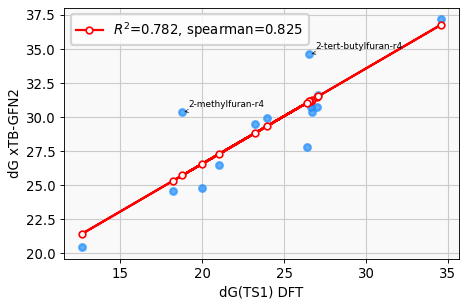

In [52]:
vis.plot_regression_outliers(df_merged, "dG(TS1)", "dG")